In [1]:
from __future__ import division, print_function, absolute_import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree
import matplotlib.pyplot as plt 
%matplotlib inline

/Users/RomilRathi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/fashion',source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/', one_hot=False)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [4]:
#Train data 
X_train = mnist.train.images
Y_train = mnist.train.labels

#Test Data 
X_test = mnist.test.images
Y_test= mnist.test.labels

#Test Images
test_images = mnist.test.images[:10]
# print(test_images)

# AutoEncoder for Fashion Data with K=10

Initialize...

 Epoch: 0 	 Average Train Error: 0.06166956802189816

 Test Error 0.06145892

 Epoch: 2 	 Average Train Error: 0.04795929150714073

 Test Error 0.0455561

 Epoch: 4 	 Average Train Error: 0.042131005466217175

 Test Error 0.042595137

 Epoch: 6 	 Average Train Error: 0.03952702064998448

 Test Error 0.040736232

 Epoch: 8 	 Average Train Error: 0.037580298143438995

 Test Error 0.037501037
Show results for 10 images...


/Users/RomilRathi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


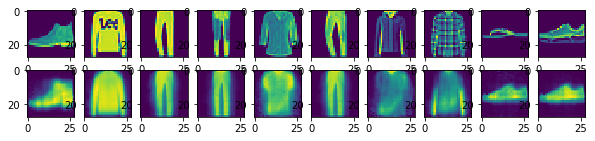

[9 2 1 1 6 1 4 6 5 7]
Print result for image at index 100...
Logistic Regression
The training accuracy is  0.6650363636363636
The testing accuracy is  0.6372
The pairwises distance for original dataset are [[0.         0.1594038  0.26823533 ... 0.43875587 0.18532205 0.4428209 ]
 [0.1594038  0.         0.40674782 ... 0.59632    0.09057891 0.60168904]
 [0.26823533 0.40674782 0.         ... 0.44886547 0.3650025  0.47375   ]
 ...
 [0.43875587 0.59632    0.44886547 ... 0.         0.65874517 0.10438752]
 [0.18532205 0.09057891 0.3650025  ... 0.65874517 0.         0.66734785]
 [0.4428209  0.60168904 0.47375    ... 0.10438752 0.66734785 0.        ]]
The pairwises distance for original dataset are [[0.         0.10044169 0.12118053 ... 0.37725455 0.11001939 0.36336398]
 [0.10044169 0.         0.2640226  ... 0.49990898 0.00052166 0.46262652]
 [0.12118053 0.2640226  0.         ... 0.35894823 0.26679903 0.34990013]
 ...
 [0.37725455 0.49990898 0.35894823 ... 0.         0.50560236 0.00412917]
 [0.1

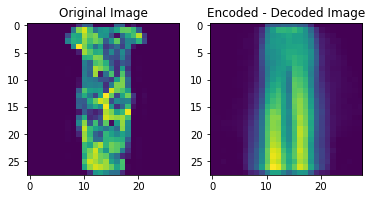

In [5]:
inputs = 784
hidden_layer = 10
output_layer = inputs

epochs = 10
batch_size = 256
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape = [None, inputs])#flattened shape

tf.set_random_seed(42)

W = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([hidden_layer, output_layer]))
}

B = {
    'encoder_h1':tf.Variable(tf.random_normal([hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([output_layer]))
}

encoder = tf.matmul(X,W['encoder_h1']) +  B['encoder_h1']
encoder = tf.sigmoid(encoder) # using sigmoid activation
decoder = tf.matmul(encoder,W['decoder_h1'])  + B['decoder_h1']
decoder = tf.sigmoid(decoder) # using sigmoid activation

Y = X
loss = tf.reduce_mean(tf.pow(decoder - Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

def get_batches(batch_size,x):
        indexes = list(range(x.shape[0]))
        random.shuffle(indexes)
        ind = indexes[:batch_size]
        return(x[ind]) 

def randomizer(r, data, n):
    randomize = np.arange(len(data))
    np.random.shuffle(randomize)
    original_data = data[randomize]
    recon_data= r[randomize]
    original_sample=original_data[:n]
    recon_sample=recon_data[:n]
    return (recon_sample,original_sample)

def show_result(data):
    hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:data})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(data.shape[0]):
        a[0][i].imshow(np.reshape(data[i], (28, 28)))
        a[1][i].imshow(np.reshape(reconstructed[i], (28, 28)))
    f.show()
    plt.draw()
    plt.show()

print("Initialize...")
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
    train_c = 0                                                       
    total_batch = int(X_train.shape[0]/batch_size)
    for i in range(total_batch):
        batch_x = get_batches(batch_size, X_train)
        _,train_c = sess.run([optimizer, loss], feed_dict = {X: batch_x})
        train_c += train_c/batch_size    
    if epoch % 2 == 0:
        print("\n Epoch:",epoch,"\t Average Train Error:",train_c)  
        test_c = sess.run(loss,feed_dict = {X:X_test})
        print("\n Test Error", test_c) 

encoder_train, decoder_train = sess.run([encoder,decoder],feed_dict = {X:X_train})
encoder_test, decoder_test = sess.run([encoder,decoder],feed_dict = {X:X_test})

#Printing 10 images in datasets and 10 images reconstructed from Autoencoder
print("Show results for 10 images...")
show_result(test_images)
print(mnist.test.labels[:10])

#Printing Single Image for Index 100
print("Print result for image at index 100...")
i = 100
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title("Encoded - Decoded Image")
img = decoder_test[i].reshape(28,28)
plt.imshow(img)

#For Classification Task
hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:X_train})
print("Logistic Regression")
loReg = LogisticRegression(penalty='l2',solver = 'lbfgs',multi_class='multinomial')
loReg.fit(reconstructed,mnist.train.labels)
predictions = loReg.predict(mnist.test.images)

score = loReg.score(reconstructed, mnist.train.labels)
print("The training accuracy is ",score)

score = loReg.score(mnist.test.images, mnist.test.labels)
print("The testing accuracy is ",score)

#Pairwise Distances
pair_data = mnist.train.images
reconstructed, original = randomizer(reconstructed, pair_data, 100)
old = pairwise_distances(original, metric="cosine")
new=  pairwise_distances(reconstructed, metric="cosine")
print("The pairwises distance for original dataset are", old)
print("The pairwises distance for original dataset are", new)

# AutoEncoder for Fashion Data with K=20

Initialize...

 Epoch: 0 	 Average Train Error: 0.05189737901673652

 Test Error 0.053354368

 Epoch: 2 	 Average Train Error: 0.03427927779557649

 Test Error 0.036891516

 Epoch: 4 	 Average Train Error: 0.032551526790484786

 Test Error 0.032646567

 Epoch: 6 	 Average Train Error: 0.030042853722989094

 Test Error 0.03101615

 Epoch: 8 	 Average Train Error: 0.0293422167233075

 Test Error 0.029142175
Show results for 10 images...


/Users/RomilRathi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


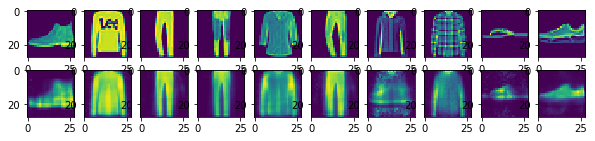

[9 2 1 1 6 1 4 6 5 7]
Print result for image at index 100...
Logistic Regression
The training accuracy is  0.7412
The testing accuracy is  0.708
The pairwises distance for original dataset are [[0.         0.33912987 0.5468579  ... 0.5692442  0.73539156 0.61524904]
 [0.33912987 0.         0.51438564 ... 0.70355666 0.7122323  0.5979321 ]
 [0.5468579  0.51438564 0.         ... 0.7218985  0.48200738 0.38902187]
 ...
 [0.5692442  0.70355666 0.7218985  ... 0.         0.85411835 0.68754256]
 [0.73539156 0.7122323  0.48200738 ... 0.85411835 0.         0.41997653]
 [0.61524904 0.5979321  0.38902187 ... 0.68754256 0.41997653 0.        ]]
The pairwises distance for original dataset are [[0.         0.21568125 0.3774516  ... 0.3971818  0.6224711  0.47278488]
 [0.21568125 0.         0.4158889  ... 0.48652452 0.5945986  0.4153368 ]
 [0.3774516  0.4158889  0.         ... 0.37313682 0.41184926 0.2344194 ]
 ...
 [0.3971818  0.48652452 0.37313682 ... 0.         0.67080307 0.5313436 ]
 [0.6224711  0.594

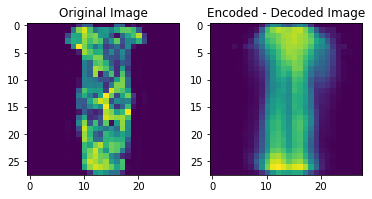

In [6]:
inputs = 784
hidden_layer = 20
output_layer = inputs

epochs = 10
batch_size = 256
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape = [None, inputs])#flattened shape

tf.set_random_seed(42)

W = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([hidden_layer, output_layer]))
}

B = {
    'encoder_h1':tf.Variable(tf.random_normal([hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([output_layer]))
}

encoder = tf.matmul(X,W['encoder_h1']) +  B['encoder_h1']
encoder = tf.sigmoid(encoder) # using sigmoid activation
decoder = tf.matmul(encoder,W['decoder_h1'])  + B['decoder_h1']
decoder = tf.sigmoid(decoder) # using sigmoid activation

Y = X
loss = tf.reduce_mean(tf.pow(decoder - Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

def get_batches(batch_size,x):
        indexes = list(range(x.shape[0]))
        random.shuffle(indexes)
        ind = indexes[:batch_size]
        return(x[ind]) 

def randomizer(r, data, n):
    randomize = np.arange(len(data))
    np.random.shuffle(randomize)
    original_data = data[randomize]
    recon_data= r[randomize]
    original_sample=original_data[:n]
    recon_sample=recon_data[:n]
    return (recon_sample,original_sample)

def show_result(data):
    hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:data})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(data.shape[0]):
        a[0][i].imshow(np.reshape(data[i], (28, 28)))
        a[1][i].imshow(np.reshape(reconstructed[i], (28, 28)))
    f.show()
    plt.draw()
    plt.show()

print("Initialize...")
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
    train_c = 0                                                       
    total_batch = int(X_train.shape[0]/batch_size)
    for i in range(total_batch):
        batch_x = get_batches(batch_size, X_train)
        _,train_c = sess.run([optimizer, loss], feed_dict = {X: batch_x})
        train_c += train_c/batch_size    
    if epoch % 2 == 0:
        print("\n Epoch:",epoch,"\t Average Train Error:",train_c)  
        test_c = sess.run(loss,feed_dict = {X:X_test})
        print("\n Test Error", test_c) 

encoder_train, decoder_train = sess.run([encoder,decoder],feed_dict = {X:X_train})
encoder_test, decoder_test = sess.run([encoder,decoder],feed_dict = {X:X_test})

#Printing 10 images in datasets and 10 images reconstructed from Autoencoder
print("Show results for 10 images...")
show_result(test_images)
print(mnist.test.labels[:10])

#Printing Single Image for Index 100
print("Print result for image at index 100...")
i = 100
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title("Encoded - Decoded Image")
img = decoder_test[i].reshape(28,28)
plt.imshow(img)

#For Classification Task
hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:X_train})
print("Logistic Regression")
loReg = LogisticRegression(penalty='l2',solver = 'lbfgs',multi_class='multinomial')
loReg.fit(reconstructed,mnist.train.labels)
predictions = loReg.predict(mnist.test.images)

score = loReg.score(reconstructed, mnist.train.labels)
print("The training accuracy is ",score)

score = loReg.score(mnist.test.images, mnist.test.labels)
print("The testing accuracy is ",score)

#Pairwise Distances
pair_data = mnist.train.images
reconstructed, original = randomizer(reconstructed, pair_data, 100)
old = pairwise_distances(original, metric="cosine")
new=  pairwise_distances(reconstructed, metric="cosine")
print("The pairwises distance for original dataset are", old)
print("The pairwises distance for original dataset are", new)

# AutoEncoder for Fashion Data with K=50

Initialize...

 Epoch: 0 	 Average Train Error: 0.044078472201363184

 Test Error 0.043880794

 Epoch: 2 	 Average Train Error: 0.028563865802425425

 Test Error 0.02914988

 Epoch: 4 	 Average Train Error: 0.025565097632352263

 Test Error 0.025207229

 Epoch: 6 	 Average Train Error: 0.023233197556692176

 Test Error 0.023274234

 Epoch: 8 	 Average Train Error: 0.0208517744904384

 Test Error 0.022025859
Show results for 10 images...


/Users/RomilRathi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


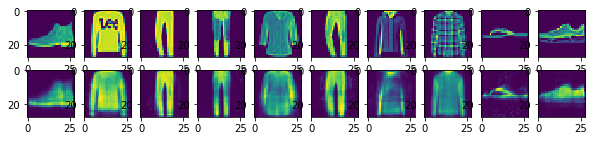

[9 2 1 1 6 1 4 6 5 7]
Print result for image at index 100...
Logistic Regression
The training accuracy is  0.7942545454545454
The testing accuracy is  0.7714
The pairwises distance for original dataset are [[0.         0.22546375 0.4045391  ... 0.16616482 0.26002538 0.5836744 ]
 [0.22546375 0.         0.51859206 ... 0.12392831 0.28215462 0.6911258 ]
 [0.4045391  0.51859206 0.         ... 0.4122641  0.3461597  0.54449326]
 ...
 [0.16616482 0.12392831 0.4122641  ... 0.         0.20062482 0.60780776]
 [0.26002538 0.28215462 0.3461597  ... 0.20062482 0.         0.63133705]
 [0.5836744  0.6911258  0.54449326 ... 0.60780776 0.63133705 0.        ]]
The pairwises distance for original dataset are [[0.         0.15298927 0.31968462 ... 0.10313177 0.23579001 0.50089324]
 [0.15298927 0.         0.35729676 ... 0.05283451 0.10568166 0.59429955]
 [0.31968462 0.35729676 0.         ... 0.27610576 0.2431392  0.3565092 ]
 ...
 [0.10313177 0.05283451 0.27610576 ... 0.         0.1085754  0.5142026 ]
 [0.2

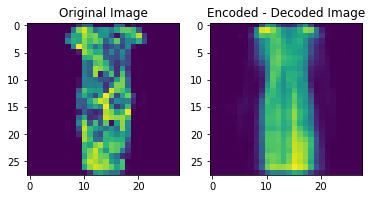

In [7]:
inputs = 784
hidden_layer = 50
output_layer = inputs

epochs = 10
batch_size = 256
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape = [None, inputs])#flattened shape

tf.set_random_seed(42)

W = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([hidden_layer, output_layer]))
}

B = {
    'encoder_h1':tf.Variable(tf.random_normal([hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([output_layer]))
}

encoder = tf.matmul(X,W['encoder_h1']) +  B['encoder_h1']
encoder = tf.sigmoid(encoder) # using sigmoid activation
decoder = tf.matmul(encoder,W['decoder_h1'])  + B['decoder_h1']
decoder = tf.sigmoid(decoder) # using sigmoid activation

Y = X
loss = tf.reduce_mean(tf.pow(decoder - Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

def get_batches(batch_size,x):
        indexes = list(range(x.shape[0]))
        random.shuffle(indexes)
        ind = indexes[:batch_size]
        return(x[ind]) 

def randomizer(r, data, n):
    randomize = np.arange(len(data))
    np.random.shuffle(randomize)
    original_data = data[randomize]
    recon_data= r[randomize]
    original_sample=original_data[:n]
    recon_sample=recon_data[:n]
    return (recon_sample,original_sample)

def show_result(data):
    hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:data})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(data.shape[0]):
        a[0][i].imshow(np.reshape(data[i], (28, 28)))
        a[1][i].imshow(np.reshape(reconstructed[i], (28, 28)))
    f.show()
    plt.draw()
    plt.show()

print("Initialize...")
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
    train_c = 0                                                       
    total_batch = int(X_train.shape[0]/batch_size)
    for i in range(total_batch):
        batch_x = get_batches(batch_size, X_train)
        _,train_c = sess.run([optimizer, loss], feed_dict = {X: batch_x})
        train_c += train_c/batch_size    
    if epoch % 2 == 0:
        print("\n Epoch:",epoch,"\t Average Train Error:",train_c)  
        test_c = sess.run(loss,feed_dict = {X:X_test})
        print("\n Test Error", test_c) 

encoder_train, decoder_train = sess.run([encoder,decoder],feed_dict = {X:X_train})
encoder_test, decoder_test = sess.run([encoder,decoder],feed_dict = {X:X_test})

#Printing 10 images in datasets and 10 images reconstructed from Autoencoder
print("Show results for 10 images...")
show_result(test_images)
print(mnist.test.labels[:10])

#Printing Single Image for Index 100
print("Print result for image at index 100...")
i = 100
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title("Encoded - Decoded Image")
img = decoder_test[i].reshape(28,28)
plt.imshow(img)

#For Classification Task
hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:X_train})
print("Logistic Regression")
loReg = LogisticRegression(penalty='l2',solver = 'lbfgs',multi_class='multinomial')
loReg.fit(reconstructed,mnist.train.labels)
predictions = loReg.predict(mnist.test.images)

score = loReg.score(reconstructed, mnist.train.labels)
print("The training accuracy is ",score)

score = loReg.score(mnist.test.images, mnist.test.labels)
print("The testing accuracy is ",score)

#Pairwise Distances
pair_data = mnist.train.images
reconstructed, original = randomizer(reconstructed, pair_data, 100)
old = pairwise_distances(original, metric="cosine")
new=  pairwise_distances(reconstructed, metric="cosine")
print("The pairwises distance for original dataset are", old)
print("The pairwises distance for original dataset are", new)

# AutoEncoder for Fashion Data with K=100

Initialize...

 Epoch: 0 	 Average Train Error: 0.053194947191514075

 Test Error 0.05194422

 Epoch: 2 	 Average Train Error: 0.03303692091139965

 Test Error 0.03284906

 Epoch: 4 	 Average Train Error: 0.026860833284445107

 Test Error 0.027005855

 Epoch: 6 	 Average Train Error: 0.023255393520230427

 Test Error 0.02399875

 Epoch: 8 	 Average Train Error: 0.020767667308973614

 Test Error 0.022072718
Show results for 10 images...


/Users/RomilRathi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


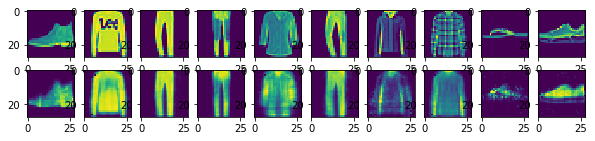

[9 2 1 1 6 1 4 6 5 7]
Print result for image at index 100...
Logistic Regression
The training accuracy is  0.8043818181818182
The testing accuracy is  0.7793
The pairwises distance for original dataset are [[0.         0.76266253 0.61581683 ... 0.532464   0.683938   0.63561875]
 [0.76266253 0.         0.34439665 ... 0.48269707 0.24216878 0.31639683]
 [0.61581683 0.34439665 0.         ... 0.28993922 0.2040661  0.15368652]
 ...
 [0.532464   0.48269707 0.28993922 ... 0.         0.40326995 0.29544836]
 [0.683938   0.24216878 0.2040661  ... 0.40326995 0.         0.17282414]
 [0.63561875 0.31639683 0.15368652 ... 0.29544836 0.17282414 0.        ]]
The pairwises distance for original dataset are [[0.         0.70216817 0.6011663  ... 0.42115664 0.59016013 0.5527505 ]
 [0.70216817 0.         0.27985942 ... 0.4734938  0.15893173 0.28864437]
 [0.6011663  0.27985942 0.         ... 0.22696108 0.12473965 0.08048558]
 ...
 [0.42115664 0.4734938  0.22696108 ... 0.         0.31251836 0.24930423]
 [0.5

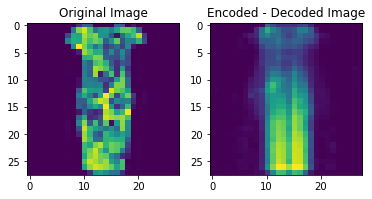

In [8]:
inputs = 784
hidden_layer = 100
output_layer = inputs

epochs = 10
batch_size = 256
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape = [None, inputs])#flattened shape

tf.set_random_seed(42)

W = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([hidden_layer, output_layer]))
}

B = {
    'encoder_h1':tf.Variable(tf.random_normal([hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([output_layer]))
}

encoder = tf.matmul(X,W['encoder_h1']) +  B['encoder_h1']
encoder = tf.sigmoid(encoder) # using sigmoid activation
decoder = tf.matmul(encoder,W['decoder_h1'])  + B['decoder_h1']
decoder = tf.sigmoid(decoder) # using sigmoid activation

Y = X
loss = tf.reduce_mean(tf.pow(decoder - Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

def get_batches(batch_size,x):
        indexes = list(range(x.shape[0]))
        random.shuffle(indexes)
        ind = indexes[:batch_size]
        return(x[ind]) 

def randomizer(r, data, n):
    randomize = np.arange(len(data))
    np.random.shuffle(randomize)
    original_data = data[randomize]
    recon_data= r[randomize]
    original_sample=original_data[:n]
    recon_sample=recon_data[:n]
    return (recon_sample,original_sample)

def show_result(data):
    hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:data})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(data.shape[0]):
        a[0][i].imshow(np.reshape(data[i], (28, 28)))
        a[1][i].imshow(np.reshape(reconstructed[i], (28, 28)))
    f.show()
    plt.draw()
    plt.show()

print("Initialize...")
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
    train_c = 0                                                       
    total_batch = int(X_train.shape[0]/batch_size)
    for i in range(total_batch):
        batch_x = get_batches(batch_size, X_train)
        _,train_c = sess.run([optimizer, loss], feed_dict = {X: batch_x})
        train_c += train_c/batch_size    
    if epoch % 2 == 0:
        print("\n Epoch:",epoch,"\t Average Train Error:",train_c)  
        test_c = sess.run(loss,feed_dict = {X:X_test})
        print("\n Test Error", test_c) 

encoder_train, decoder_train = sess.run([encoder,decoder],feed_dict = {X:X_train})
encoder_test, decoder_test = sess.run([encoder,decoder],feed_dict = {X:X_test})

#Printing 10 images in datasets and 10 images reconstructed from Autoencoder
print("Show results for 10 images...")
show_result(test_images)
print(mnist.test.labels[:10])

#Printing Single Image for Index 100
print("Print result for image at index 100...")
i = 100
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title("Encoded - Decoded Image")
img = decoder_test[i].reshape(28,28)
plt.imshow(img)

#For Classification Task
hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:X_train})
print("Logistic Regression")
loReg = LogisticRegression(penalty='l2',solver = 'lbfgs',multi_class='multinomial')
loReg.fit(reconstructed,mnist.train.labels)
predictions = loReg.predict(mnist.test.images)

score = loReg.score(reconstructed, mnist.train.labels)
print("The training accuracy is ",score)

score = loReg.score(mnist.test.images, mnist.test.labels)
print("The testing accuracy is ",score)

#Pairwise Distances
pair_data = mnist.train.images
reconstructed, original = randomizer(reconstructed, pair_data, 100)
old = pairwise_distances(original, metric="cosine")
new=  pairwise_distances(reconstructed, metric="cosine")
print("The pairwises distance for original dataset are", old)
print("The pairwises distance for original dataset are", new)

# AutoEncoder for Fashion Data with K=200

Initialize...

 Epoch: 0 	 Average Train Error: 0.07148876684368588

 Test Error 0.068756364

 Epoch: 2 	 Average Train Error: 0.05295279614801984

 Test Error 0.052490268

 Epoch: 4 	 Average Train Error: 0.046616650754003786

 Test Error 0.046306297

 Epoch: 6 	 Average Train Error: 0.04303217280539684

 Test Error 0.043250818

 Epoch: 8 	 Average Train Error: 0.04311432217946276

 Test Error 0.04071451
Show results for 10 images...


/Users/RomilRathi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


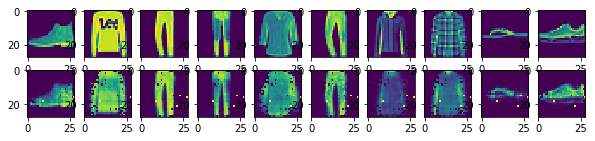

[9 2 1 1 6 1 4 6 5 7]
Print result for image at index 100...
Logistic Regression
The training accuracy is  0.8130181818181819
The testing accuracy is  0.7594
The pairwises distance for original dataset are [[0.         0.5377159  0.28778416 ... 0.34984076 0.5406089  0.44199622]
 [0.5377159  0.         0.45383966 ... 0.4683619  0.6323328  0.6475765 ]
 [0.28778416 0.45383966 0.         ... 0.1253668  0.40671927 0.47253704]
 ...
 [0.34984076 0.4683619  0.1253668  ... 0.         0.3706091  0.51956594]
 [0.5406089  0.6323328  0.40671927 ... 0.3706091  0.         0.7386448 ]
 [0.44199622 0.6475765  0.47253704 ... 0.51956594 0.7386448  0.        ]]
The pairwises distance for original dataset are [[0.         0.45030338 0.2638657  ... 0.33062387 0.49014723 0.2911601 ]
 [0.45030338 0.         0.38563144 ... 0.3825242  0.55385315 0.48887217]
 [0.2638657  0.38563144 0.         ... 0.05538887 0.33241642 0.4099396 ]
 ...
 [0.33062387 0.3825242  0.05538887 ... 0.         0.30816138 0.40776658]
 [0.4

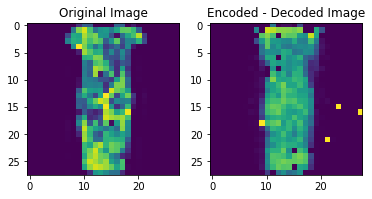

In [9]:
inputs = 784
hidden_layer = 200
output_layer = inputs

epochs = 10
batch_size = 256
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape = [None, inputs])#flattened shape

tf.set_random_seed(42)

W = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([hidden_layer, output_layer]))
}

B = {
    'encoder_h1':tf.Variable(tf.random_normal([hidden_layer])),
    'decoder_h1':tf.Variable(tf.random_normal([output_layer]))
}

encoder = tf.matmul(X,W['encoder_h1']) +  B['encoder_h1']
encoder = tf.sigmoid(encoder) # using sigmoid activation
decoder = tf.matmul(encoder,W['decoder_h1'])  + B['decoder_h1']
decoder = tf.sigmoid(decoder) # using sigmoid activation

Y = X
loss = tf.reduce_mean(tf.pow(decoder - Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

def get_batches(batch_size,x):
        indexes = list(range(x.shape[0]))
        random.shuffle(indexes)
        ind = indexes[:batch_size]
        return(x[ind]) 

def randomizer(r, data, n):
    randomize = np.arange(len(data))
    np.random.shuffle(randomize)
    original_data = data[randomize]
    recon_data= r[randomize]
    original_sample=original_data[:n]
    recon_sample=recon_data[:n]
    return (recon_sample,original_sample)

def show_result(data):
    hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:data})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(data.shape[0]):
        a[0][i].imshow(np.reshape(data[i], (28, 28)))
        a[1][i].imshow(np.reshape(reconstructed[i], (28, 28)))
    f.show()
    plt.draw()
    plt.show()

print("Initialize...")
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
    train_c = 0                                                       
    total_batch = int(X_train.shape[0]/batch_size)
    for i in range(total_batch):
        batch_x = get_batches(batch_size, X_train)
        _,train_c = sess.run([optimizer, loss], feed_dict = {X: batch_x})
        train_c += train_c/batch_size    
    if epoch % 2 == 0:
        print("\n Epoch:",epoch,"\t Average Train Error:",train_c)  
        test_c = sess.run(loss,feed_dict = {X:X_test})
        print("\n Test Error", test_c) 

encoder_train, decoder_train = sess.run([encoder,decoder],feed_dict = {X:X_train})
encoder_test, decoder_test = sess.run([encoder,decoder],feed_dict = {X:X_test})

#Printing 10 images in datasets and 10 images reconstructed from Autoencoder
print("Show results for 10 images...")
show_result(test_images)
print(mnist.test.labels[:10])

#Printing Single Image for Index 100
print("Print result for image at index 100...")
i = 100
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title("Encoded - Decoded Image")
img = decoder_test[i].reshape(28,28)
plt.imshow(img)

#For Classification Task
hidden, reconstructed = sess.run([encoder,decoder],feed_dict = {X:X_train})
print("Logistic Regression")
loReg = LogisticRegression(penalty='l2',solver = 'lbfgs',multi_class='multinomial')
loReg.fit(reconstructed,mnist.train.labels)
predictions = loReg.predict(mnist.test.images)

score = loReg.score(reconstructed, mnist.train.labels)
print("The training accuracy is ",score)

score = loReg.score(mnist.test.images, mnist.test.labels)
print("The testing accuracy is ",score)

#Pairwise Distances
pair_data = mnist.train.images
reconstructed, original = randomizer(reconstructed, pair_data, 100)
old = pairwise_distances(original, metric="cosine")
new=  pairwise_distances(reconstructed, metric="cosine")
print("The pairwises distance for original dataset are", old)
print("The pairwises distance for original dataset are", new)